# Module 12: Visualization -II 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'], 
                  data={'Apples':[20, 10, 40, 20, 50],
                        'Oranges':[35, 40, 25, 19, 33]})
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


## 12.1   Ploting selected variables from dataframe 

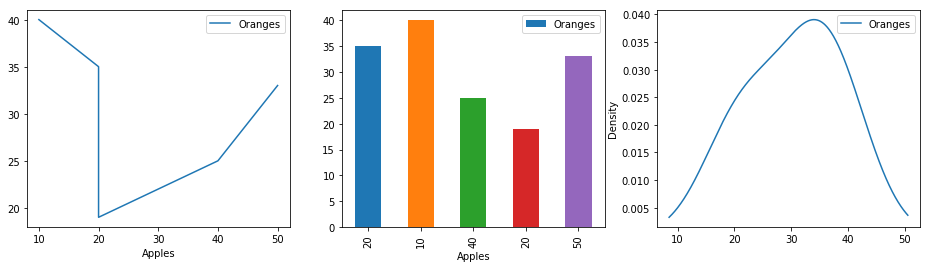

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
df.sort_values('Apples').plot(x='Apples', y='Oranges', kind='line', ax=ax1)
df.plot(x='Apples', y='Oranges', kind='bar', ax=ax2)
df.plot(x='Apples', kind='kde', ax=ax3)

# 12.2   Visualizing the flights dataset

In [6]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [7]:
# creating abinary variable 'DELAYED', which is 1 if flight is delayed >= (ge) 15 minutes

flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)
flights['DELAYED'].head()    #checking that this is a binary variable




0    1
1    0
2    1
3    0
4    1
Name: DELAYED, dtype: int32

In [8]:
# creating a list of columns containing info on flights not arriving on time

cols = ['DIVERTED', 'CANCELLED', 'DELAYED']

flights[cols].head()   # checking that columns 'DIVERTED' 'CANCELLED', and 'DELAYED' are all binary


,DIVERTED,CANCELLED,DELAYED
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,1


In [9]:
# creating a binary column flights['ON_TIME'] which takes value 1 if flight is on time.

#     The 'ON_TIME' column is created by first creating a binary variable which takes value=0
#     if *any* of the columns DIVERTED, CANCELLED', or 'DELAYED' is 1. 
#      Note that .any(cols) returns True of False if any of the variables in cols list are non-zero non-missing

flights['ON_TIME'] = 1 - flights[cols].any(axis=1)

# appending 'ON_TIME' column to the list of columns 
cols.append('ON_TIME')

# Summing all (the one's in all) columns in the list 'cols'
status = flights[cols].sum()
status


DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

## Univariate plots 

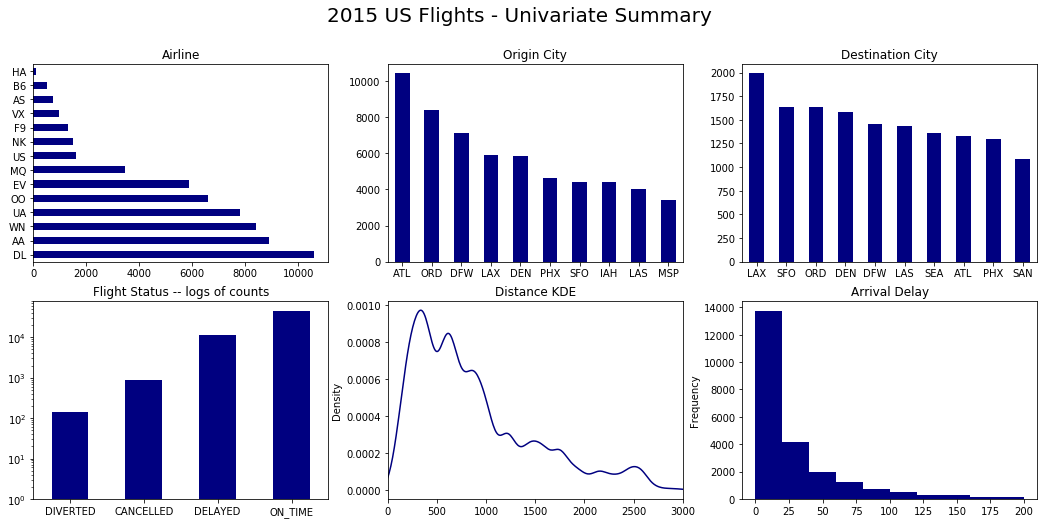

In [10]:
fig, ax_array = plt.subplots(2, 3, figsize=(18,8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size=20)

ac = flights['AIRLINE'].value_counts()
ac.plot(kind='barh', color = 'navy', ax=ax1, title ='Airline')

oc = flights['ORG_AIR'].value_counts()
oc.plot(kind='bar', color = 'navy', ax=ax2, rot=0, title='Origin City')

dc = flights['DEST_AIR'].value_counts().head(10)
dc.plot(kind='bar', color = 'navy', ax=ax3, rot=0, title='Destination City')

# Note the log=True parameter  below. We plot logs of count -- y-axis 10^0, 10^1, 10^2,...

status.plot(kind='bar', color = 'navy',  ax=ax4, rot=0, log=True, title='Flight Status -- logs of counts')
flights['DIST'].plot(kind='kde',color = 'navy',  ax=ax5, xlim=(0, 3000),                  
                     title='Distance KDE')

# Note range=(0, 200). We plot only the arrival delays that within this range.
flights['ARR_DELAY'].plot(kind='hist', color = 'navy', ax=ax6, 
                          title='Arrival Delay', range=(0,200))

In [11]:
# 1. separating hours and minutes from 'SCHED_DEP' column, and adding year=2015
hour = flights['SCHED_DEP'] // 100
minute = flights['SCHED_DEP'] % 100

# 2. putting year, month, day, hour, minute columns into a dataframe 

df_date = flights[['MONTH', 'DAY']].assign(YEAR=2015, HOUR=hour, MINUTE=minute)
df_date.head()

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20


In [12]:
#3. creating timestamp using pandas to_date() function
flight_dep = pd.to_datetime(df_date)
flight_dep.head()

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

In [13]:
flights.index = flight_dep
flights.resample('W').size().head()



2015-01-04     666
2015-01-11    1088
2015-01-18    1120
2015-01-25    1169
2015-02-01    1103
Freq: W-SUN, dtype: int64

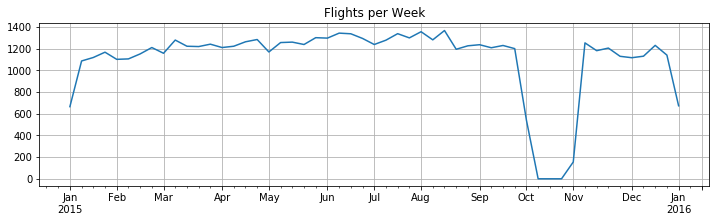

In [14]:
# ploting the resampled weekly series
# We assign the resample() expression to fc but unlike the above cel,l we REMOVE .head() so full series is plotted

fc= flights.resample('W').size()   # 'W' is for weekly resampling

fc.plot(figsize=(12,3), title='Flights per Week', grid=True)

Text(0.5,1,'Flights per Week (Interpolated Missing Data)')

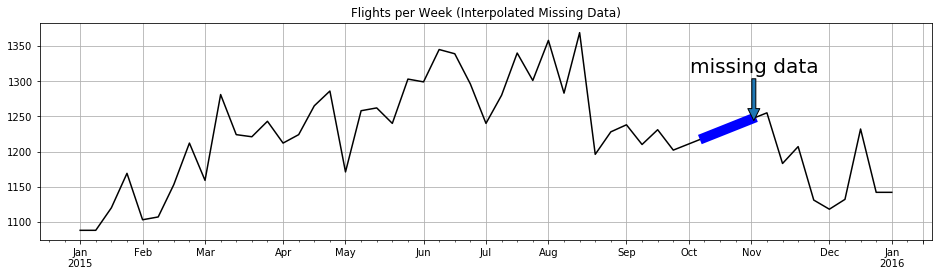

In [15]:
fc_miss = fc.where(fc >  1000)
fc_intp = fc_miss.interpolate(limit_direction='both')

ax = fc_intp.plot(color='black', figsize=(16,4))
fc_intp[fc < 500].plot(linewidth=10, grid=True, 
                       color='blue', ax=ax)

ax.annotate(xy=(.8, .55), xytext=(.8, .77), 
            xycoords='axes fraction', s='missing data', 
            ha='center',  size=20, arrowprops=dict())
ax.set_title('Flights per Week (Interpolated Missing Data)')

## Multivariate plots 

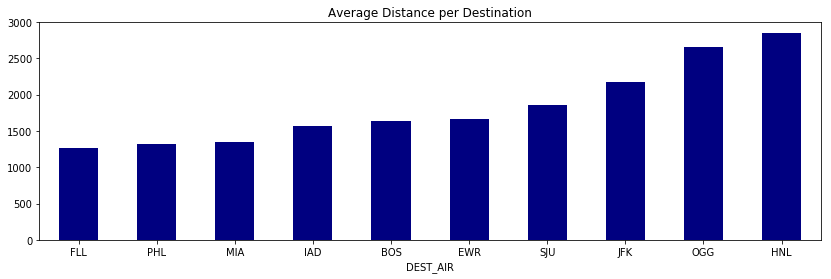

In [16]:
# Using groupby to generate counts and means of distance, by destination
# Plotting AIR_TIME and DIST (for distances gt 100)

flights.groupby('DEST_AIR')['DIST'] \
       .agg(['mean', 'count']) \
       .query('count > 100') \
       .sort_values('mean') \
       .tail(10) \
       .plot(kind='bar', y='mean', color ='navy', legend=False, 
             rot=0, figsize=(14,4),
             title='Average Distance per Destination')

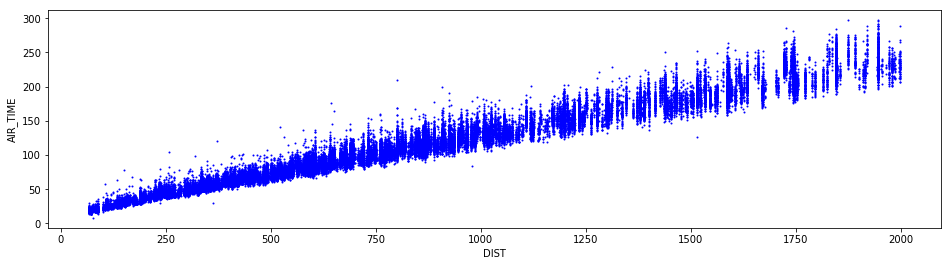

In [17]:
fs = flights.query('DIST <= 2000').dropna()
fs.plot(x='DIST', y='AIR_TIME', kind='scatter', color= 'blue', s=1, figsize=(16,4))

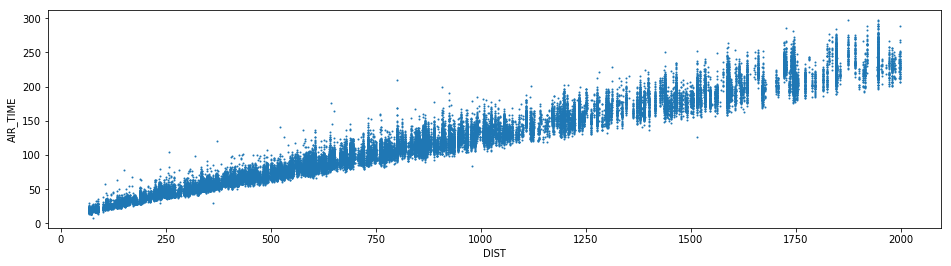

In [18]:
fs = flights.reset_index(drop=True)[['DIST', 'AIR_TIME']].query('DIST <= 2000').dropna()
fs.plot(x='DIST', y='AIR_TIME', kind='scatter', s=1, figsize=(16,4))

# Note the s=1 parameter is used to reduce the dot size, as there are many data points.

In [28]:
#1. binning the DIST variable, bin size =250

fs['DIST_GROUP'] = pd.cut(fs['DIST'], bins=range(0, 2001, 250))
fs['DIST_GROUP'].value_counts().sort_index()

(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: DIST_GROUP, dtype: int64

In [29]:
#2. creating the z-score (with normalize function) 
#   merging it back by DIST_GROUP to dataframe by using the transform function

normalize = lambda x: (x - x.mean()) / x.std()
fs['TIME_SCORE'] = fs.groupby('DIST_GROUP')['AIR_TIME'] \
                     .transform(normalize)

fs.head()

,DIST,AIR_TIME,DIST_GROUP,TIME_SCORE
0,590,94.0,"(500, 750]",0.490966
1,1452,154.0,"(1250, 1500]",-1.267551
2,641,85.0,"(500, 750]",-0.296749
3,1192,126.0,"(1000, 1250]",-1.211020
4,1363,166.0,"(1250, 1500]",-0.521999


Text(0.5,0.98,'')

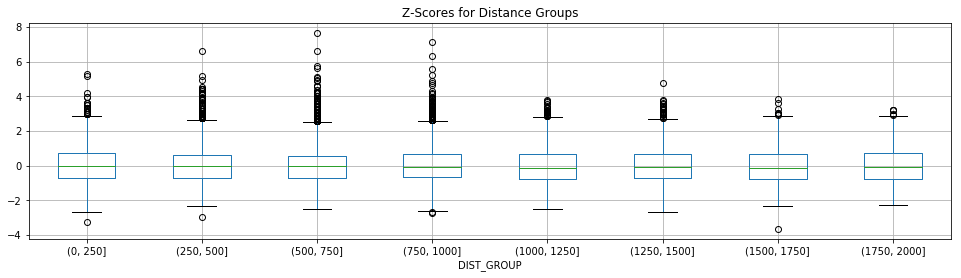

In [30]:
# 3. creating box plots by DIST_GROUP

ax = fs.boxplot(by='DIST_GROUP', column='TIME_SCORE', figsize=(16,4))
ax.set_title('Z-Scores for Distance Groups')
ax.figure.suptitle('')

# Visualization with Seaborn

In [36]:
employee = pd.read_csv('data/employee.csv', 
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [38]:
import seaborn as sns

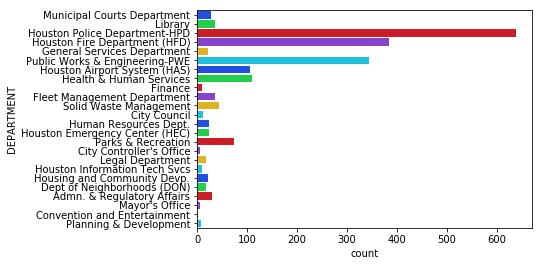

In [49]:
# we want the count of departments. use seaborn countplot()
# seabosn palette options are: deep, muted, bright, pastel, dark, colorblind

sns.countplot(y='DEPARTMENT', data=employee, palette='bright')

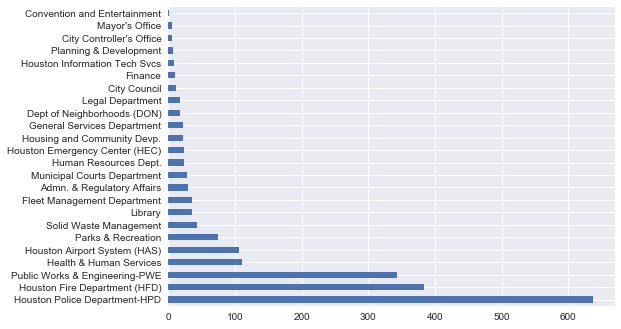

In [77]:
employee['DEPARTMENT'].value_counts().plot('barh')

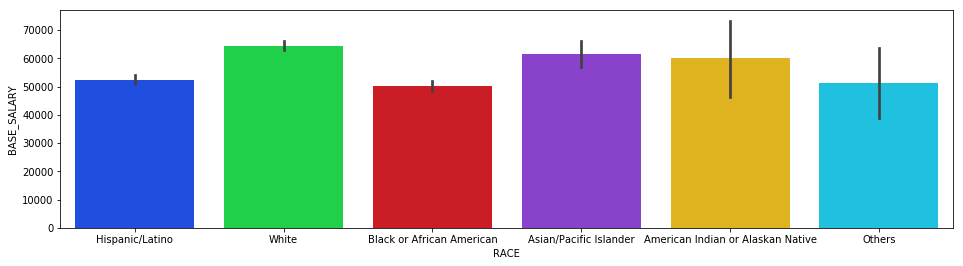

In [55]:
# creating barplot of average BASE_SALARY by RACE
# No need to take means by race-- seaborn does it automatically

ax = sns.barplot(x='RACE', y='BASE_SALARY', data=employee, palette='bright')
ax.figure.set_size_inches(16, 4)

Text(0,0.5,'Mean Salary')

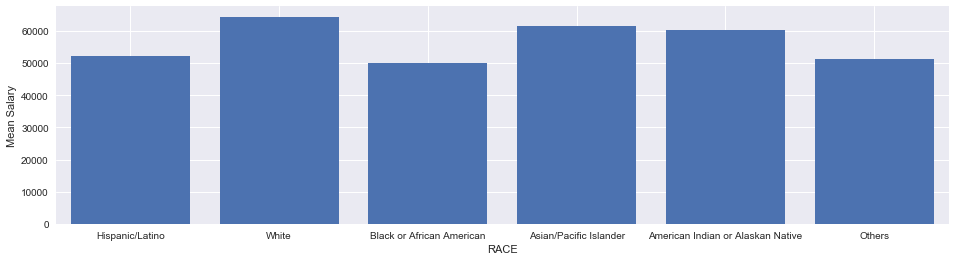

In [79]:
avg_sal = employee.groupby('RACE', sort=False)['BASE_SALARY'].mean()
ax = avg_sal.plot(kind='bar', rot=0, figsize=(16,4), width=.8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel('Mean Salary')

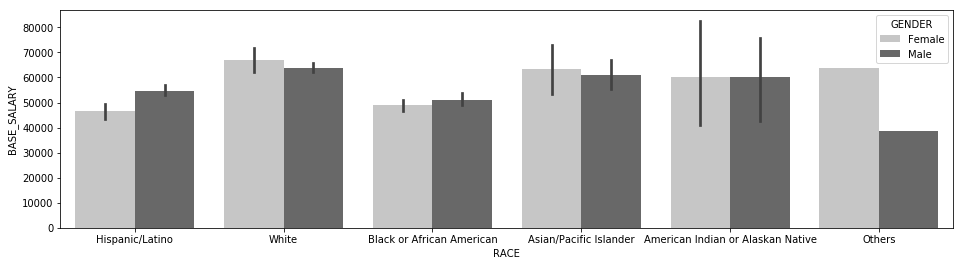

In [62]:
# seaborn can distinguish groups through a third variable (hue= 'column name')

ax = sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER', 
                 data=employee, palette='Greys')
ax.figure.set_size_inches(16,4)

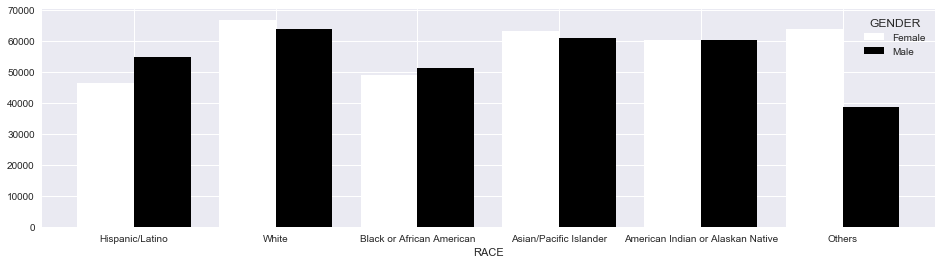

In [81]:
employee.groupby(['RACE', 'GENDER'], sort=False)['BASE_SALARY'] \
        .mean().unstack('GENDER') \
        .plot(kind='bar', figsize=(16,4), rot=0,
              width=.8, cmap='Greys')

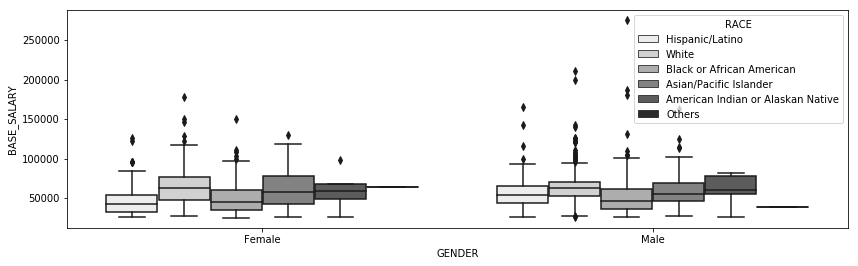

In [65]:
# creating boxplots of BASE_SALARY
# Now y-axis is just the level of BASE_SALARY (not mean) because whole dist is represented

ax = sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee, hue='RACE', palette='Greys')
ax.figure.set_size_inches(14,4)

# Doing multivariate analysis with seaborn grids

In [66]:
# calculating years of experience -- 
# taking difference between current date (12-1-2016) and HIRE_DATE 
# dividing by time delta to get the difference in years

employee = pd.read_csv('data/employee.csv', 
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
days_hired = (pd.to_datetime('12-1-2016') - employee['HIRE_DATE'])

one_year = pd.Timedelta(1, unit='Y')   #defining timedelta = year

employee['YEARS_EXPERIENCE'] =  days_hired / one_year
employee[['HIRE_DATE', 'YEARS_EXPERIENCE']].head()

,HIRE_DATE,YEARS_EXPERIENCE
0,2006-06-12,10.472494
1,2000-07-19,16.369946
2,2015-02-03,1.826184
3,1982-02-08,34.812488
4,1989-06-19,27.452994


In [67]:
import seaborn as sns

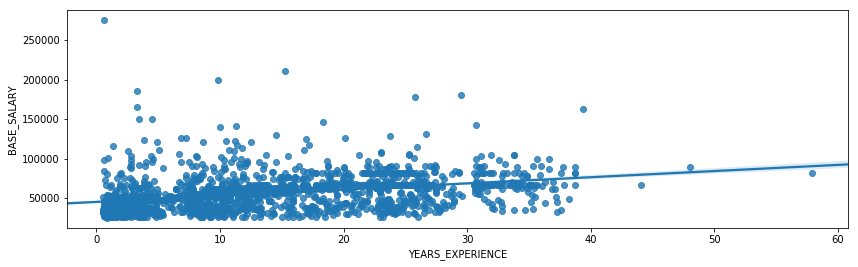

In [68]:
ax = sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                 data=employee)
ax.figure.set_size_inches(14,4)

seaborn.axisgrid.FacetGrid

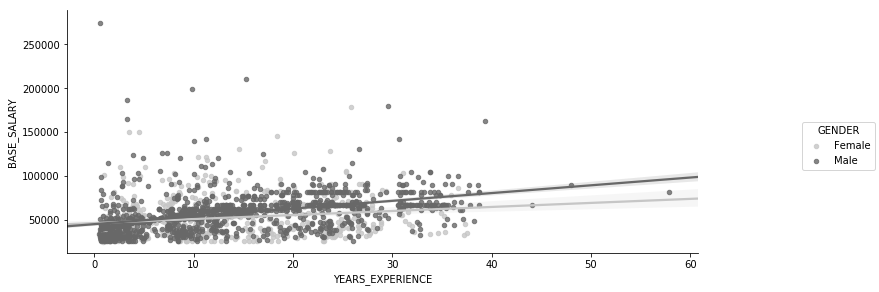

In [74]:
# regplot() does not produces two regression lines for each gender
# using lmplot() with hue=GENDER, instead
# scatter_kws is for specifying keyword arguments. Size of dot =20 is specified

grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', palette='Greys',
                  scatter_kws={'s':20}, data=employee)
grid.fig.set_size_inches(14, 4)
type(grid)

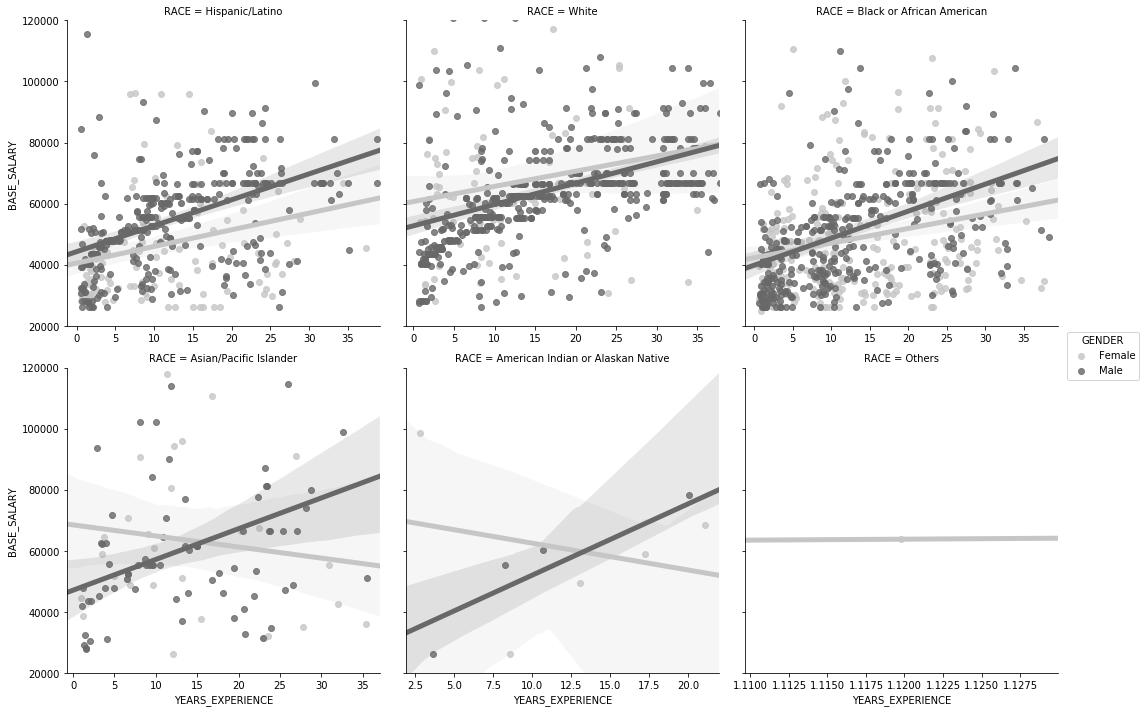

In [76]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', col='RACE', col_wrap=3,
                  palette='Greys', sharex=False,
                  line_kws = {'linewidth':5},
                  data=employee)

grid.set(ylim=(20000, 120000))

In [90]:
deps = employee['DEPARTMENT'].value_counts().index[:2]
races = employee['RACE'].value_counts().index[:3]
is_dep = employee['DEPARTMENT'].isin(deps)
is_race = employee['RACE'].isin(races)
emp2 = employee[is_dep & is_race].copy()
emp2['DEPARTMENT'] = emp2.DEPARTMENT.str.extract('(HPD|HFD)', expand=True)
emp2.shape

(968, 11)

In [91]:
emp2['DEPARTMENT'].value_counts()

HPD    591
HFD    377
Name: DEPARTMENT, dtype: int64

In [92]:
emp2['RACE'].value_counts()

White                        478
Hispanic/Latino              250
Black or African American    240
Name: RACE, dtype: int64

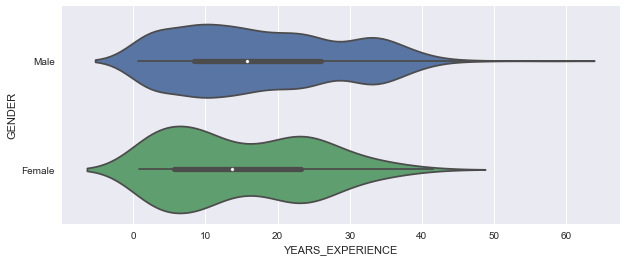

In [93]:
ax = sns.violinplot(x = 'YEARS_EXPERIENCE', y='GENDER', data=emp2)
ax.figure.set_size_inches(10,4)

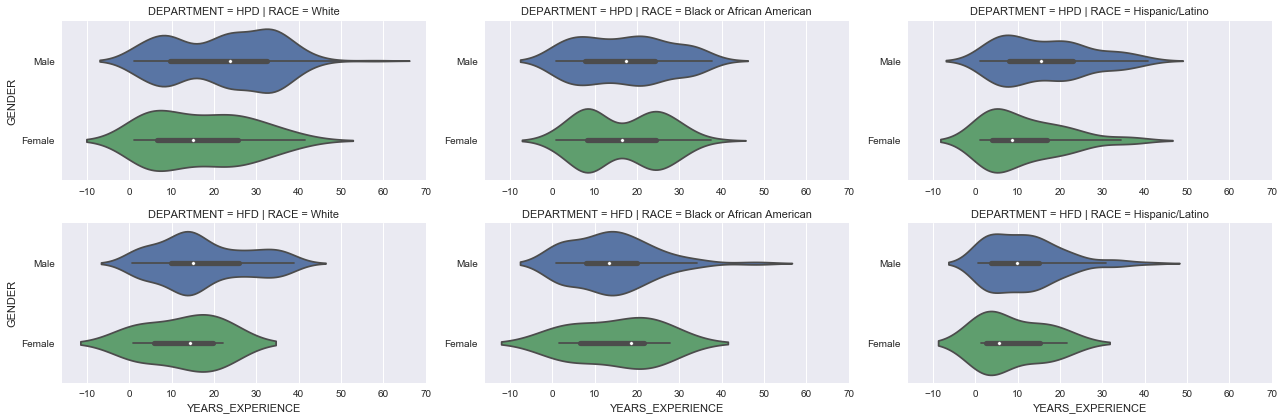

In [94]:
sns.factorplot(x ='YEARS_EXPERIENCE', y='GENDER',
               col='RACE', row='DEPARTMENT', 
               size=3, aspect=2,
               data=emp2, kind='violin')